<a href="https://colab.research.google.com/github/ujjwal-pixel/Heart-Disease-Prediction-/blob/main/HEART_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING ESSENTIAL LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#READING THE CSV FILE USING PANDAS

In [ ]:
data=pd.read_csv('//content/heart_disease_data.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# print last 5 rows of the dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


#EXPLORATORY DATA ANALYSIS

In [ ]:
# number of rows and columns in the dataset
data.shape

(303, 14)

In [ ]:
#getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#checking dat for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
#1-Defective Heart 
#0-Healthy Heart 
data['target'].value_counts()


1    165
0    138
Name: target, dtype: int64

**1- DEFECTIVE HEART**

**0- HEALTHY HEART**



#CHECKING CORRELATION AMONG ALL THE VARIOUS FEATURES 



 which feature is negatively correlated and which is positively correlated so, Let’s check the correlation between various features.

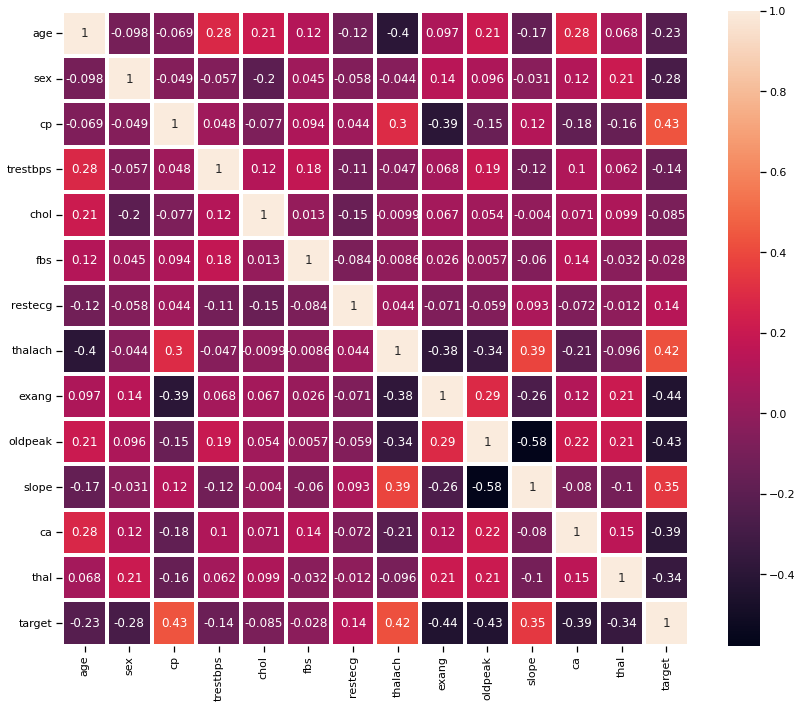

In [ ]:
plt.figure(figsize=(12,10))
sns.set_context(context='notebook',font_scale=1)
sns.heatmap(data.corr(),annot=True,linewidth=3)
plt.tight_layout()

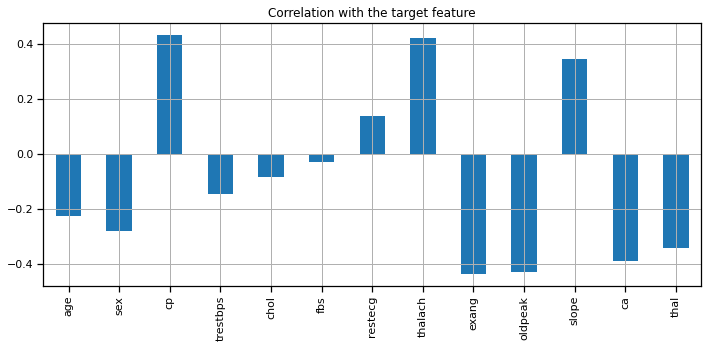

In [ ]:
#RELATION OF TARGET VARIABLES WITH OTHER VARIABLES
sns.set_context(context='notebook',font_scale=1)
data.drop('target',axis=1).corrwith(data.target).plot(kind='bar',grid=True,figsize=(10,5),
                                                       title='Correlation with the target feature')
plt.tight_layout()

Inshight from avobe graph:- Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature. Other features are negatively correlated with the target feature.

The analysis of the individual features which comprises both univariate and bivariate analysis.

#AGE ANALYSIS

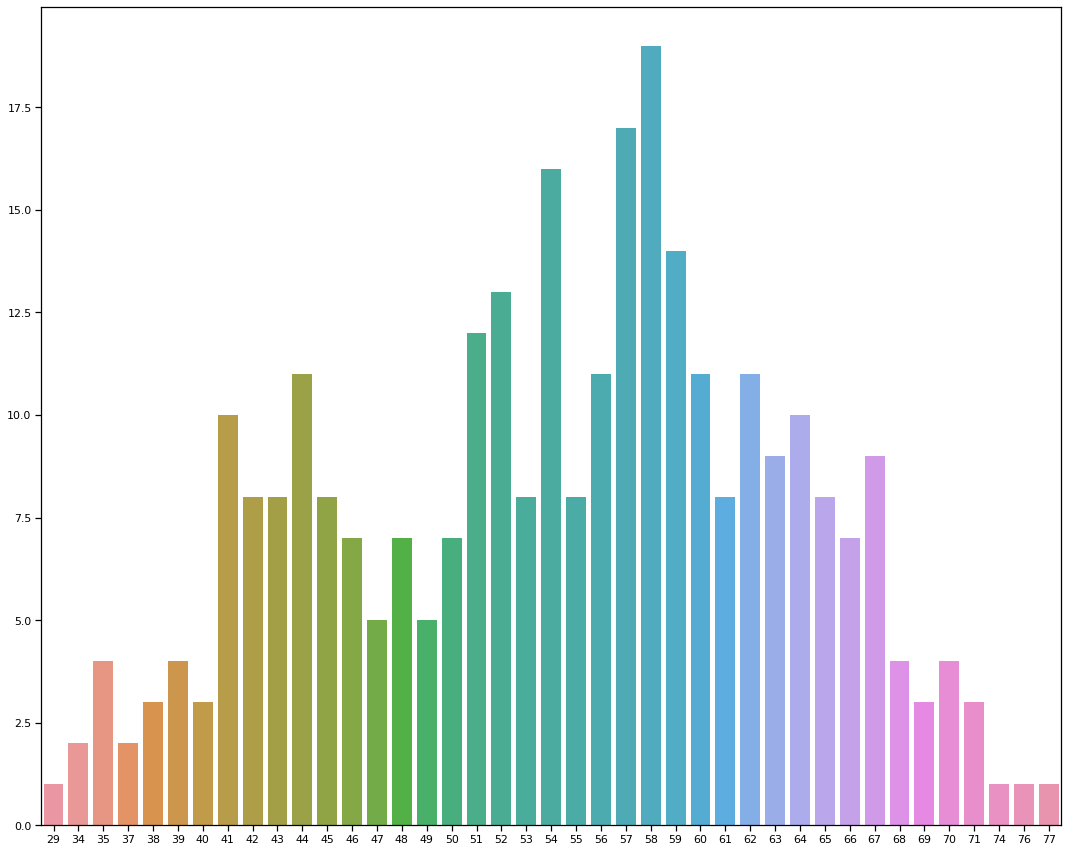

In [ ]:
plt.figure(figsize=(15,12))
sns.set_context('notebook',font_scale = 1)
sns.barplot(x=data.age.value_counts()[:50].index,y=data.age.value_counts()[:50].values)
plt.tight_layout()

Avobe picture shows:- ***The 58 age column has the highest frequency.***

Let’s check the range of age in the dataset.

In [ ]:
minAge=min(data.age)#MINIMUM AGE IN DATASET
maxAge=max(data.age)#MAXIMUM AGE IN DATASET
print('Min Age :',minAge)
print('Max Age :',maxAge)

Min Age : 29
Max Age : 77


Divide the Age feature into three parts – “Young”, “Middle” and “Elder”

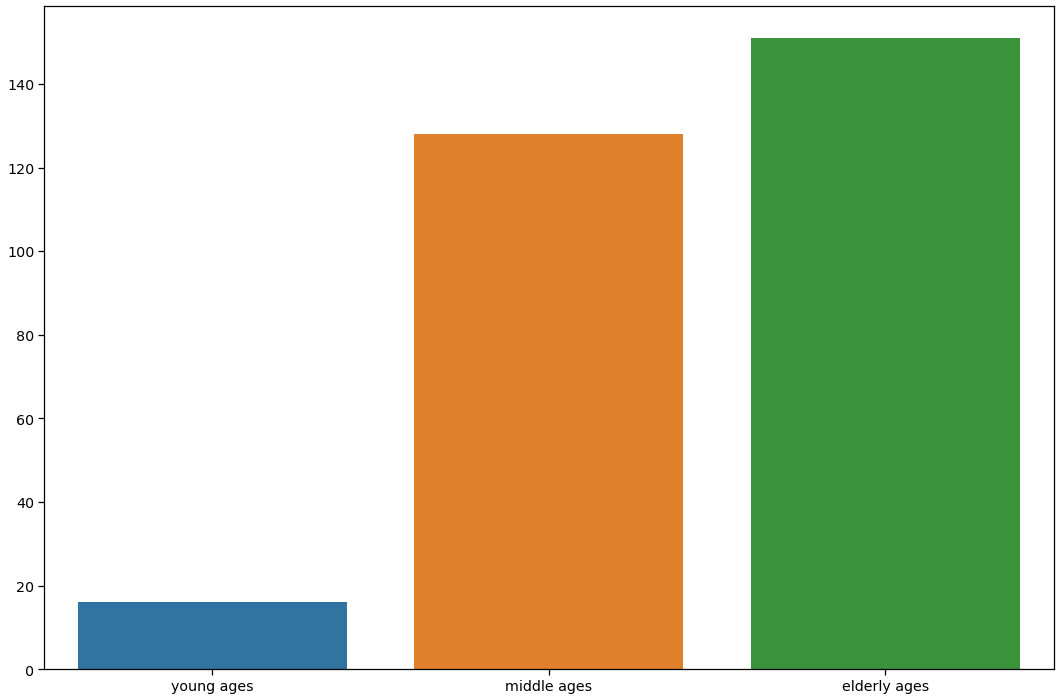

In [ ]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(15,10))
sns.set_context('notebook',font_scale = 1.3)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

Above picture shows:- Elder people are the most affected by heart disease and young ones are the least affected.

Plot pie chart of Aabove picture

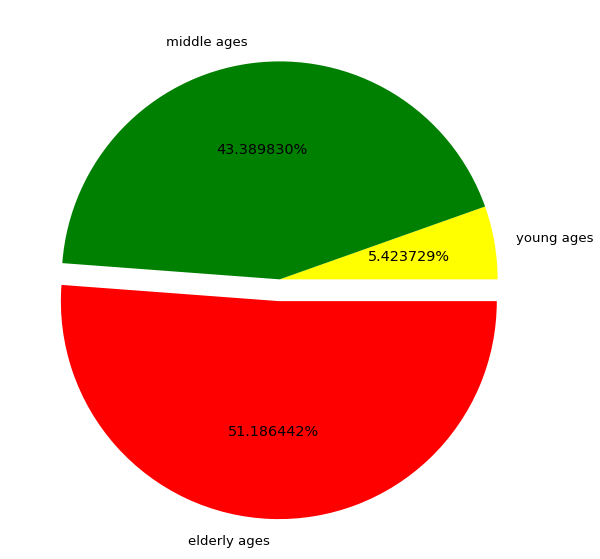

In [ ]:
colors = ['yellow','green','red']
explode = [0,0,0.1]
plt.figure(figsize=(10,8))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1f%%')
plt.tight_layout()

#SEX FEATURE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


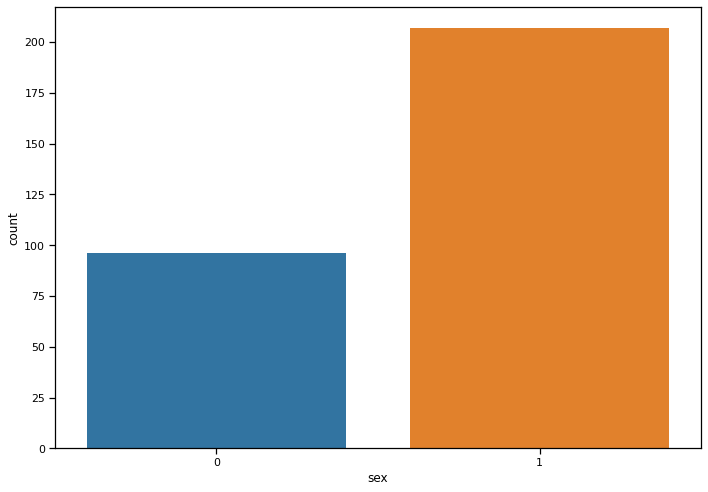

In [ ]:
plt.figure(figsize=(10,7))
sns.set_context('notebook',font_scale = 1)
sns.countplot(data['sex'])
plt.tight_layout()

**1- MALE**

**0- FEMALE**

Above picture shows:- Ratio of Male to Female is approx 2:1.

plot the relation between sex and slope.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


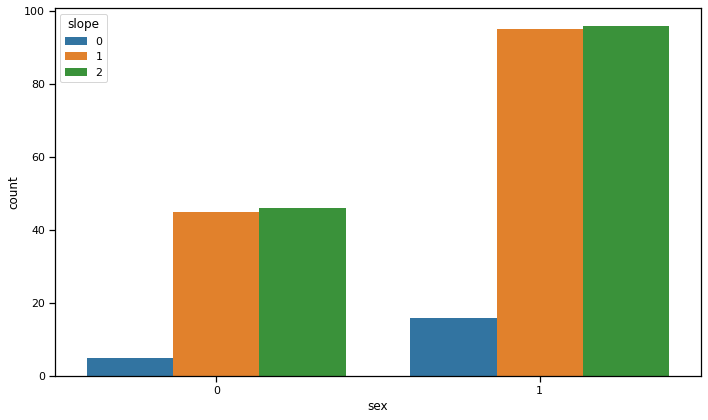

In [ ]:
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale = 1)
sns.countplot(data['sex'],hue=data["slope"])
plt.tight_layout()

Here it is clearly visible that the slope value is higher in the case of **Males(1).**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


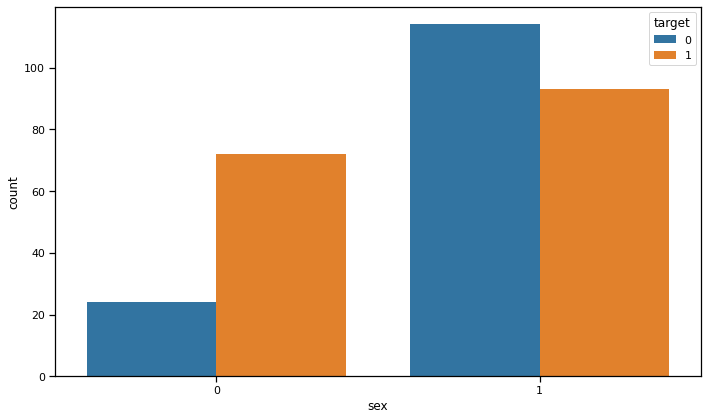

In [ ]:
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale = 1)
sns.countplot(data['sex'],hue=data["target"])
plt.tight_layout()

#**CHEST PAIN** TYPE (cp) ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


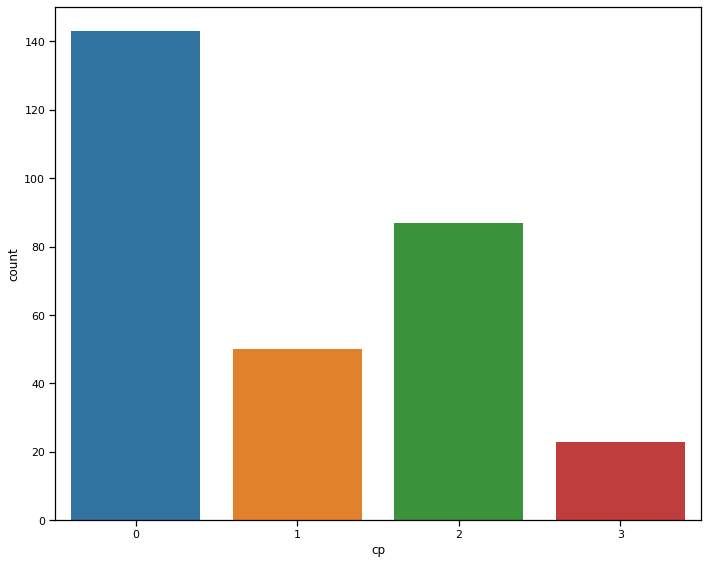

In [ ]:
''' As seen, there are 4 types of chest pain
status at least
condition slightly distressed
condition medium problem
condition too bad '''
plt.figure(figsize=(10,8))
sns.set_context('notebook',font_scale = 1)
sns.countplot(data['cp'])
plt.tight_layout()

analyze cp vs target

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


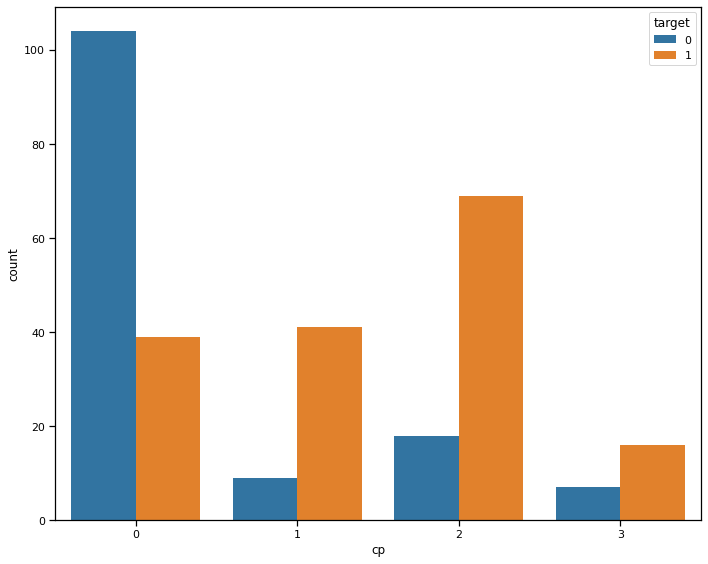

In [ ]:
#People having the least chest pain are not likely to have heart disease.
#People having severe chest pain are likely to have heart disease.
plt.figure(figsize=(10,8,))
sns.set_context('notebook',font_scale = 1)
sns.countplot(data['cp'],hue=data["target"],)
plt.tight_layout()

#Thal analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


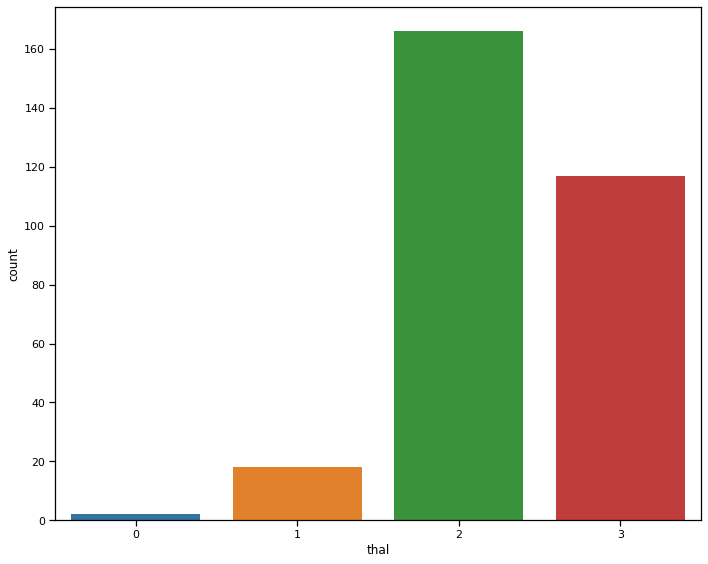

In [ ]:
plt.figure(figsize=(10,8))
sns.set_context('notebook',font_scale = 1)
sns.countplot(data['thal'])
plt.tight_layout()

#TARGET

In [ ]:
# checking the distribution of Target Variable
#1-Defective Heart 
#0-Healthy Heart 
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


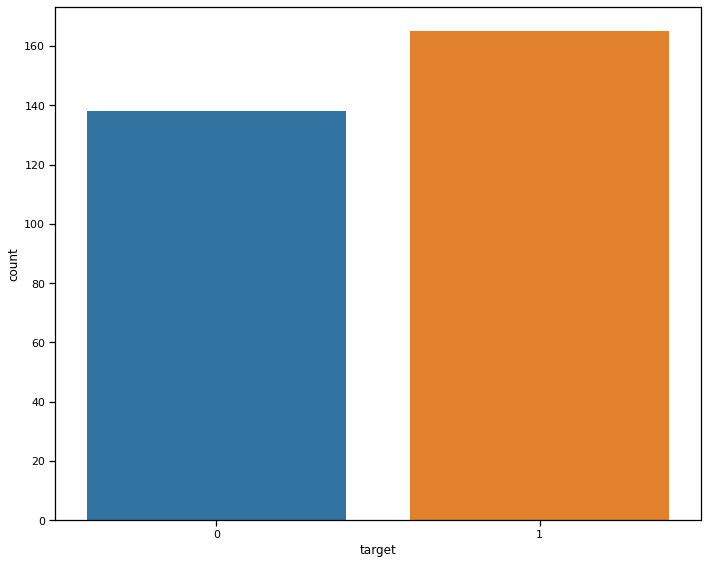

In [ ]:
'''The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced.
 So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.'''
plt.figure(figsize=(10,8))
sns.set_context('notebook',font_scale = 1)
sns.countplot(data['target'])
plt.tight_layout()

#PREDICTIVE MODEL 

#LOGISTIC REGRESSION 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Splitting the Features and Target

In [ ]:
X = data.drop(columns= 'target', axis=1)
Y = data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


#TRAINING,TESTING & SPLITTING THE DATA

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.01,random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(303, 13) (299, 13) (4, 13)
(303,) (299,) (4,)


#Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

 **MODEL EVALUATION**
 
 **ACCURACY SCORE**

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.8528428093645485
Accuracy on Test data :  0.75


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(X_test_prediction,Y_test)

array([[2, 0],
       [1, 1]])

#INPUT DATA TO CHECK THE PREDICTIVE MODEL 

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
